# The Sparks Foundation #GRIPJUNE2021

# Data Science & Business Analytics Tasks
# BY- Akshit Bagri

## Exploratory Data Analysis - Terrorism(TASK 4)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv("globalterrorismdb_0718dist.csv", encoding= 'ISO-8859-1', low_memory= False)

In [3]:
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## Cleaning Data

In [5]:
#Since there are 135 Columns. We will take those columns which will be more helpful for our Analysis
dataset.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Duration','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','natlty1_txt':'Nationality','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive','ishostkid':'Host'},inplace=True)
terror = dataset[['Year','Month','Day','Duration','Country','Region','city','latitude','longitude','success','suicide','AttackType','Target','Nationality','Group','Motive','Weapon_type','Killed','Wounded','Summary','Target_type','Host']]
terror['Casualities']= terror['Killed'] + terror['Wounded']
terror.head(5)

<ipython-input-5-6e0b6cb1faff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror['Casualities']= terror['Killed'] + terror['Wounded']


,Year,Month,Day,Duration,Country,Region,city,latitude,longitude,success,...,Nationality,Group,Motive,Weapon_type,Killed,Wounded,Summary,Target_type,Host,Casualities
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,...,Dominican Republic,MANO-D,NaN,Unknown,1.0,0.0,NaN,Private Citizens & Property,0.0,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,...,Belgium,23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,Government (Diplomatic),1.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,...,United States,Unknown,NaN,Unknown,1.0,0.0,NaN,Journalists & Media,0.0,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,1,...,United States,Unknown,NaN,Explosives,NaN,NaN,NaN,Government (Diplomatic),0.0,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,...,United States,Unknown,NaN,Incendiary,NaN,NaN,NaN,Government (Diplomatic),0.0,NaN


In [6]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Duration            0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
success             0
suicide             0
AttackType          0
Target            636
Nationality      1559
Group               0
Motive         131130
Weapon_type         0
Killed          10313
Wounded         16311
Summary         66129
Target_type         0
Host              178
Casualities     16874
dtype: int64

## Exploratory Data Analysis (EDA)

In [7]:
print("Country With Highest Terrorist Attacks:", terror['Country'].value_counts().index[0])
print("Region With Highest Terrorist Attacks:", terror['Region'].value_counts().index[0])
print("Most Casaulties in an Attack were:", terror['Casualities'].max()," , Which took place in the Country",terror.loc[terror['Casualities'].idxmax()].Country)

Country With Highest Terrorist Attacks: Iraq
Region With Highest Terrorist Attacks: Middle East & North Africa
Most Casaulties in an Attack were: 9574.0  , Which took place in the Country United States


### Number of Terriorst Attacks Each Year

C:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


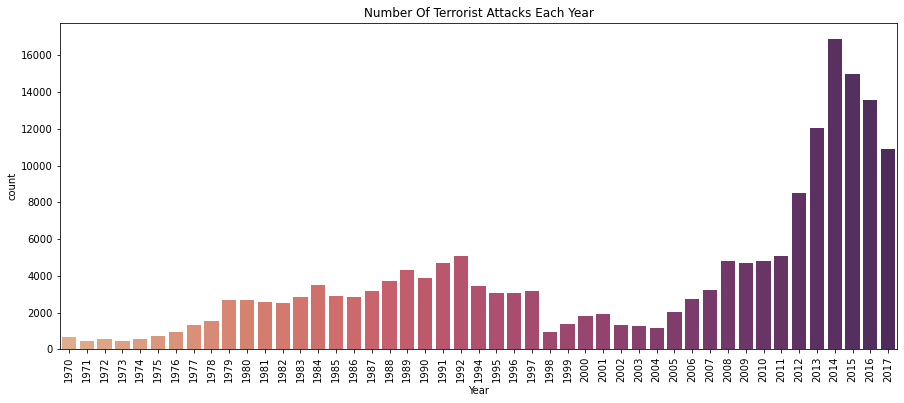

In [8]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='flare')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks Each Year')
plt.show()

### Number of Casualities Each Year

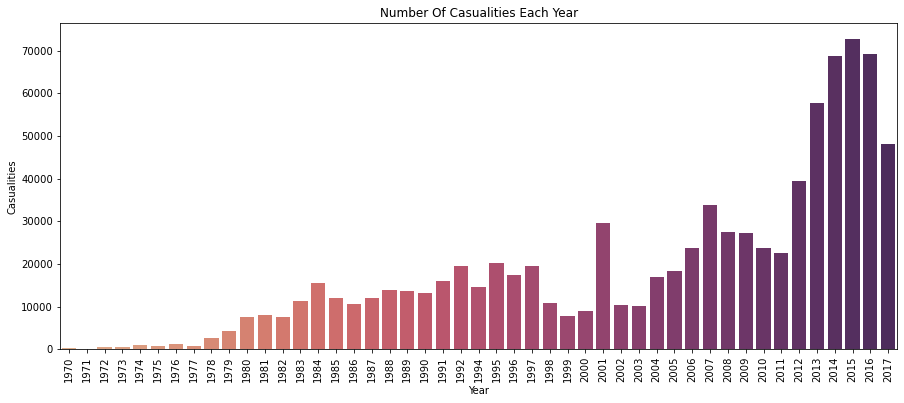

In [9]:
plt.subplots(figsize=(15,6))
year_cas = terror.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
sns.barplot(x=year_cas.Year, y=year_cas.Casualities, palette='flare')
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year')
plt.show()

### Attacks Categorized By Unsuccessful and Successful 

Text(0.5, 1.0, 'successful and Unsuccessful Attacks')

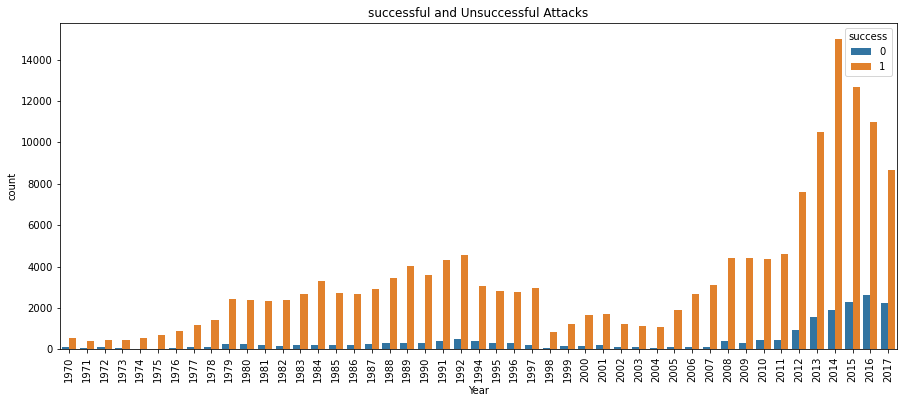

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Year', hue='success', data=terror)
plt.xticks(rotation=90)
plt.title('successful and Unsuccessful Attacks')

### Terrorism By Top 15 Affected Countries

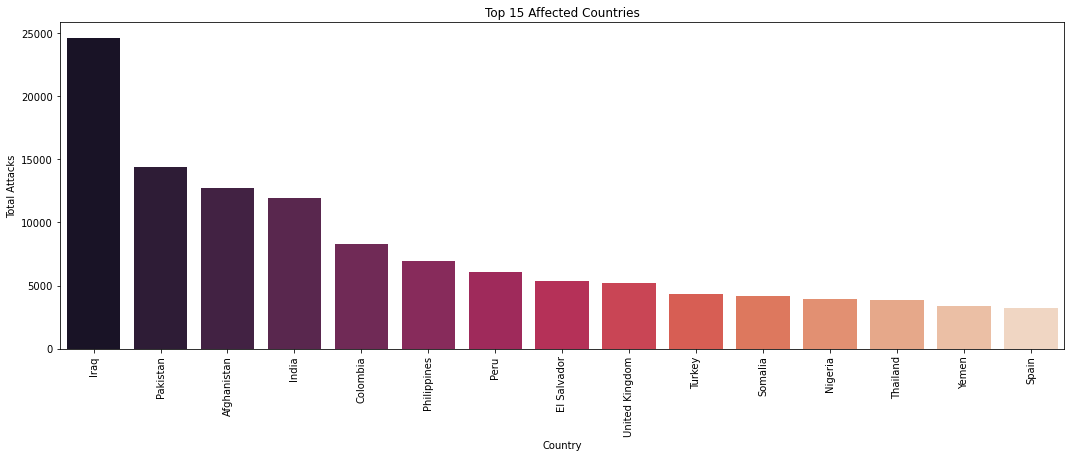

In [11]:
plt.subplots(figsize=(18,6))
country_attacks = terror.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'rocket')
plt.xticks(rotation=90)
plt.title('Top 15 Affected Countries')
plt.show()

### Casualities in Top 15 Affected Countries

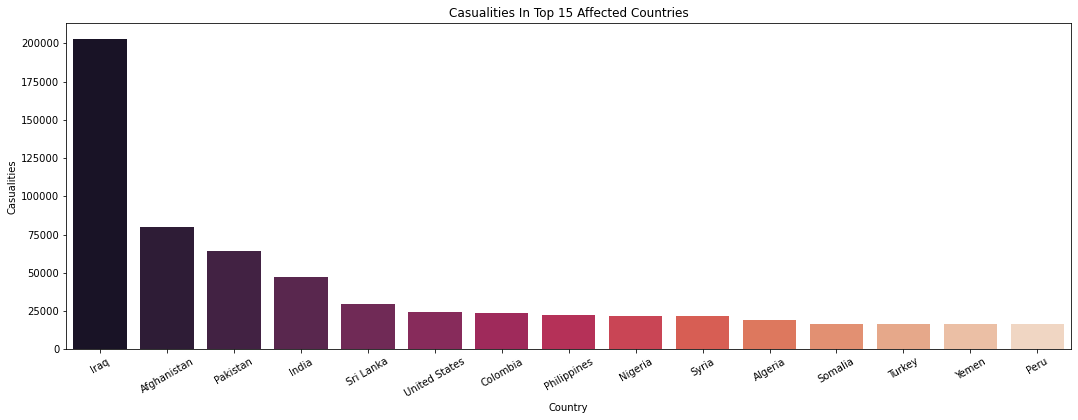

In [12]:
plt.subplots(figsize=(18,6))
count_cas = terror.groupby('Country').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:15]
sns.barplot(x=count_cas.Country, y=count_cas.Casualities, palette= 'rocket')
plt.xticks(rotation=30)
plt.title('Casualities In Top 15 Affected Countries')
plt.show()

### Terrorism By Affected Cities and their Casualities

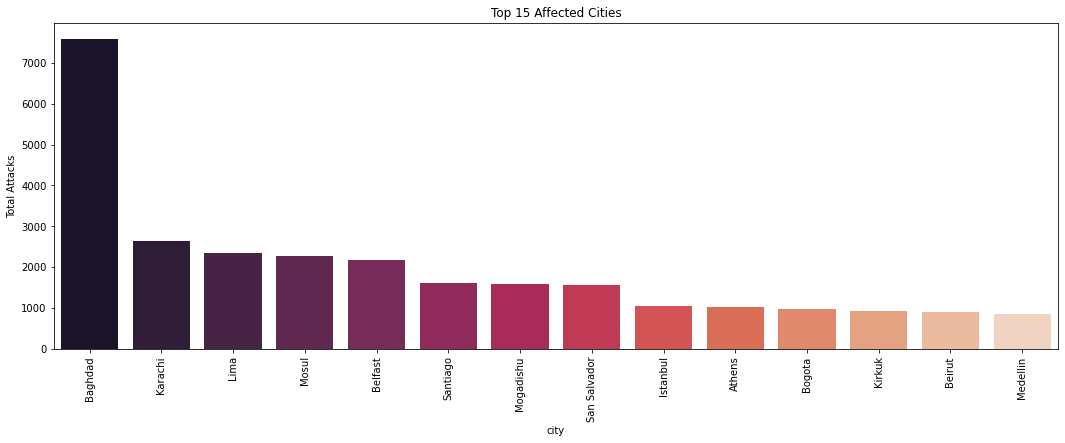

In [19]:
plt.subplots(figsize=(18,6))
city_attacks = terror.city.value_counts()[:15].drop('Unknown').reset_index()
city_attacks.columns = ['city', 'Total Attacks']
sns.barplot(x=city_attacks.city, y=city_attacks['Total Attacks'], palette= 'rocket')
plt.xticks(rotation=90)
plt.title('Top 15 Affected Cities')
plt.show()